<a href="https://colab.research.google.com/github/ayhanardal/data-analysis/blob/main/Deprem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',None)
pd.set_option('display.max_column',None)

In [252]:
data = pd.read_html("https://deprem.afad.gov.tr/last-earthquakes.html")
data = data[0]
data = data[['Tarih(TS)','Tip','Yer','Büyüklük']]
data['Tarih'] = pd.to_datetime(data['Tarih(TS)'])
data = data.drop('Tarih(TS)', axis = 1)
data = data[['Tarih','Yer','Büyüklük','Tip']]

kaf_cities = ['İzmit','Bolu','Düzce','Zonguldak','Bartın','Karabük','Kastamonu','Çankırı','Ankara','Samsun']
marmara_cities = ['Yalova','İstanbul','Çanakkale','Tekirdağ','İzmit','Bursa','Balıkesir']

city_filters = [kaf_cities, marmara_cities, ['İstanbul'], ['Çanakkale']]

colors = ['#d62728','#ff7f0e', '#1f77b4', '#2ca02c', '#9467bd']

year = data.sort_values('Tarih', ascending=False)['Tarih'][0].year
month = data.sort_values('Tarih', ascending=False)['Tarih'][0].month
day = data.sort_values('Tarih', ascending=False)['Tarih'][0].day
hour = data.sort_values('Tarih', ascending=False)['Tarih'][0].hour
min = data.sort_values('Tarih', ascending=False)['Tarih'][0].minute

def filter_data(data, region):
  return data[(data['Yer'].str.contains('|'.join(region)))]

kaf = filter_data(data, city_filters[0])
marmara = filter_data(data, city_filters[1])
istanbul = filter_data(data, city_filters[2])
canakkale = filter_data(data, city_filters[3])

datas = {'Türkiye':data, 'Kaf': kaf,'Marmara':marmara, 'İstanbul':istanbul, 'Çanakkale':canakkale}

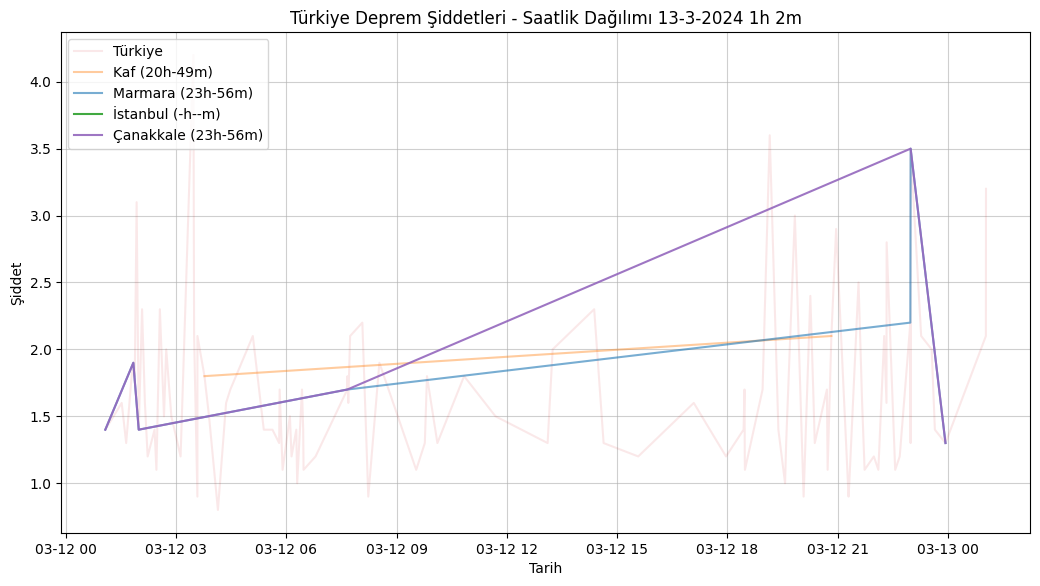

In [253]:
plt.figure(figsize=(12.5, 6.5))
plt.xlabel('Tarih')
plt.ylabel('Şiddet')
plt.title(f'Türkiye Deprem Şiddetleri - Saatlik Dağılımı {day}-{month}-{year} {hour}h {min}m')
plt.grid(True, alpha=0.6)

kaf_date = kaf.sort_values('Tarih', ascending=False)['Tarih']
marmara_date = marmara.sort_values('Tarih', ascending=False)['Tarih']
ist_date = istanbul.sort_values('Tarih', ascending=False)['Tarih']
can_date = canakkale.sort_values('Tarih', ascending=False)['Tarih']

last_kaf = [kaf_date.reset_index(drop=True)[0].hour if len(kaf_date) > 0 else '-', kaf_date.reset_index(drop=True)[0].minute if len(kaf_date) > 0 else '-']
last_marmara = [marmara_date.reset_index(drop=True)[0].hour if len(marmara_date) > 0 else '-', marmara_date.reset_index(drop=True)[0].minute if len(marmara_date) > 0 else '-']
last_ist = [ist_date.reset_index(drop=True)[0].hour if len(ist_date) > 0 else '-', ist_date.reset_index(drop=True)[0].minute if len(ist_date) > 0 else '-']
last_can = [can_date.reset_index(drop=True)[0].hour if len(can_date) > 0 else '-', can_date.reset_index(drop=True)[0].minute if len(can_date) > 0 else '-']

plt.plot(data['Tarih'], data['Büyüklük'], label = 'Türkiye', alpha = 0.1, color=colors[0])
plt.plot(kaf['Tarih'], kaf['Büyüklük'], label = f'Kaf ({last_kaf[0]}h-{last_kaf[1]}m)', alpha = 0.4, color=colors[1])
plt.plot(marmara['Tarih'], marmara['Büyüklük'], label = f'Marmara ({last_marmara[0]}h-{last_marmara[1]}m)', alpha = 0.6, color=colors[2])
plt.plot(istanbul['Tarih'], istanbul['Büyüklük'], label = f'İstanbul ({last_ist[0]}h-{last_ist[1]}m)', alpha = 0.9, color=colors[3])
plt.plot(canakkale['Tarih'], canakkale['Büyüklük'], label = f'Çanakkale ({last_can[0]}h-{last_can[1]}m)', alpha = 0.9, color=colors[4])

plt.legend(loc='upper left')
plt.show()

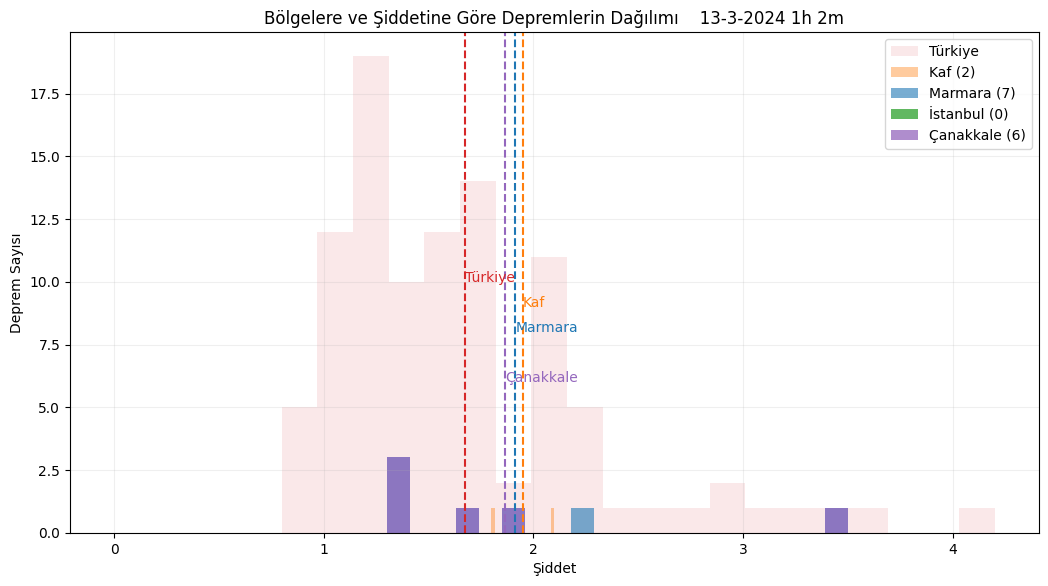

In [254]:
plt.figure(figsize=(12.5, 6.5))
plt.xlabel('Şiddet')
plt.ylabel('Deprem Sayısı')
plt.title(f'Bölgelere ve Şiddetine Göre Depremlerin Dağılımı    {day}-{month}-{year} {hour}h {min}m')
plt.grid(True, alpha=0.2)

len_kaf = len(kaf['Büyüklük'])
len_marmara = len(marmara['Büyüklük'])
len_ist = len(istanbul['Büyüklük'])
len_can = len(canakkale['Büyüklük'])

plt.hist(data['Büyüklük'], bins = 20, label = 'Türkiye', alpha = 0.1, color = colors[0])
plt.hist(kaf['Büyüklük'], bins = 20, label = f'Kaf ({len_kaf})', alpha = 0.4, color = colors[1])
plt.hist(marmara['Büyüklük'], bins = 20, label = f'Marmara ({len_marmara})', alpha = 0.6, color = colors[2])
plt.hist(istanbul['Büyüklük'], bins = 20, label = f'İstanbul ({len_ist})', alpha = 0.75, color = colors[3])
plt.hist(canakkale['Büyüklük'], bins = 20, label = f'Çanakkale ({len_can})', alpha = 0.75, color = colors[4])

plt.axvline(data['Büyüklük'].mean(), color=colors[0], linestyle='dashed')
plt.axvline(kaf['Büyüklük'].mean(), color=colors[1], linestyle='dashed')
plt.axvline(marmara['Büyüklük'].mean(), color=colors[2], linestyle='dashed')
plt.axvline(istanbul['Büyüklük'].mean(), color=colors[3], linestyle='dashed')
plt.axvline(canakkale['Büyüklük'].mean(), color=colors[4], linestyle='dashed')

plt.annotate('Türkiye', (data['Büyüklük'].mean(), 10), color=colors[0])
plt.annotate('Kaf', (kaf['Büyüklük'].mean(), 9), color=colors[1])
plt.annotate('Marmara', (marmara['Büyüklük'].mean(), 8), color=colors[2])
plt.annotate('İstanbul', (istanbul['Büyüklük'].mean(), 7), color=colors[3])
plt.annotate('Çanakkale', (canakkale['Büyüklük'].mean(), 6), color=colors[4])

plt.legend(loc='best')
plt.show()

In [255]:
data[(data['Tip'] == 'MW')].sort_values('Tarih',ascending=False)

,Tarih,Yer,Büyüklük,Tip
81,2024-03-12 03:27:59,"Gilan-e-Gharb, Kermanshah (İran)",4.2,MW


In [256]:
data.sort_values('Büyüklük', ascending = False).head(5)

,Tarih,Yer,Büyüklük,Tip
81,2024-03-12 03:27:59,"Gilan-e-Gharb, Kermanshah (İran)",4.2,MW
33,2024-03-12 19:09:14,Sumbas (Osmaniye),3.6,ML
6,2024-03-12 22:59:20,Biga (Çanakkale),3.5,ML
0,2024-03-13 01:02:25,Gürün (Sivas),3.2,ML
93,2024-03-12 01:55:18,Pütürge (Malatya),3.1,ML
